## _Importo las librerias a utlizar_

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [67]:
df = pd.read_csv("./BBDD_Hospitalización.csv")
df


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,"4,43",NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## _Borro columnas que no sean utiles y cambiamos su texto a minuscula_

In [68]:
df.drop(columns=["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS","NUMERO DE MUESTRAS TOMADAS","CUP",
                 "TIPO DE CULTIVO","ENF. CRONICA PULMONAR OBSTRUCTIVA","PATRON DE RESISTENCIA",
                 "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA","AGENTE AISLADO",
                 "DIAS HOSPITALIZACION MQ","DIAS HOSPITALIZACIÓN UPC","HOSPITALIZACIÓN ULTIMO MES","BIOPSIAS PREVIAS"],inplace=True)
columnas ={}
for columnaReal,columnaCambio in zip(df.columns,df.columns.str.capitalize()):
    columnas[columnaReal] = columnaCambio
columnas
#df.columns = df.columns.str.capitalize()
df = df.rename(columns=columnas)

### <U> CAMBIO VALORES SI/NO A BINARIO <u>

In [69]:
df = df.replace({
    "No":0,
    "NO":0,
    "Si":1,
    "SI":1
})

C:\Users\Martin\AppData\Local\Temp\ipykernel_17164\2268532638.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


* Analizo el tipo de datos

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                568 non-null    float64
 1   Diabetes            568 non-null    float64
 2   Psa                 564 non-null    object 
 3   Volumen prostatico  567 non-null    float64
 4   Biopsia             568 non-null    object 
 5   Fiebre              568 non-null    float64
 6   Itu                 568 non-null    float64
 7   Hospitalizacion     565 non-null    float64
dtypes: float64(6), object(2)
memory usage: 35.8+ KB


#### Cambio de valores `object` a `float`

In [71]:
df["Psa"]=df['Psa'].str.replace(",",".")
df["Psa"]=df["Psa"].astype(float)

In [72]:
df

,Edad,Diabetes,Psa,Volumen prostatico,Biopsia,Fiebre,Itu,Hospitalizacion
0,53.0,0.0,4.00,1.0,NEG,1.0,0.0,1.0
1,56.0,0.0,7.70,1.0,NEG,1.0,0.0,1.0
2,57.0,0.0,29.00,1.0,NEG,1.0,0.0,1.0
3,56.0,0.0,7.00,1.0,NEG,1.0,0.0,1.0
4,55.0,0.0,29.00,1.0,NEG,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
565,69.0,0.0,4.43,NaN,NEG,0.0,0.0,0.0
566,67.0,0.0,8.00,1.0,ADENOCARCINOMA GLEASON 7,0.0,0.0,0.0
567,59.0,0.0,9.00,1.0,NEG,0.0,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Analizamos la cantidad de `null`

In [73]:
df.isna().sum()

Edad                  2
Diabetes              2
Psa                   6
Volumen prostatico    3
Biopsia               2
Fiebre                2
Itu                   2
Hospitalizacion       5
dtype: int64

<u>REEMPLAZO VALORES NaN<u>

In [74]:
def replace_nan_number(df,column):
    for c in column:
        mean = round(df[c].mean())
        df[c].fillna(value=mean,inplace=True)
    return df

def replace_nan_str(df,column):
    for c in column:
        mean = df[c].mode()[0]
        df[c].fillna(value=mean,inplace=True)
    return df

df = replace_nan_number(df,["Edad"])
df = replace_nan_str(df,["Hospitalizacion"])
df = replace_nan_str(df,["Psa"])
df = replace_nan_str(df,["Diabetes"])
df

C:\Users\Martin\AppData\Local\Temp\ipykernel_17164\2268945533.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(value=mean,inplace=True)
C:\Users\Martin\AppData\Local\Temp\ipykernel_17164\2268945533.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,Edad,Diabetes,Psa,Volumen prostatico,Biopsia,Fiebre,Itu,Hospitalizacion
0,53.0,0.0,4.00,1.0,NEG,1.0,0.0,1.0
1,56.0,0.0,7.70,1.0,NEG,1.0,0.0,1.0
2,57.0,0.0,29.00,1.0,NEG,1.0,0.0,1.0
3,56.0,0.0,7.00,1.0,NEG,1.0,0.0,1.0
4,55.0,0.0,29.00,1.0,NEG,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
565,69.0,0.0,4.43,NaN,NEG,0.0,0.0,0.0
566,67.0,0.0,8.00,1.0,ADENOCARCINOMA GLEASON 7,0.0,0.0,0.0
567,59.0,0.0,9.00,1.0,NEG,0.0,0.0,0.0
568,64.0,0.0,6.00,NaN,NaN,NaN,NaN,0.0


# REEMPLAZO DE OUTLIERS

In [75]:
def remove_otuliers(df,column,threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    df["Edad"] = df[column].mask(((df[column]-mean)/std)>threshold, mean)
    return df

df = remove_otuliers(df,"Edad")

- Obtengo valores de interes acerca de la biopsia que me interesa _(prostática)_

In [76]:
biopsiaNeg = df["Biopsia"][df["Biopsia"].isin(["NEG",'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'])].unique()
biopsiaPos = df["Biopsia"][~df["Biopsia"].isin(["NEG",'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'])].unique()
dict_biopsia_pos = {}
dict_biopsia_neg = {}
for dato in biopsiaPos:
    dict_biopsia_pos[dato] = 1
for dato in biopsiaNeg:
    dict_biopsia_neg[dato] = 0
df= replace_nan_str(df,["Biopsia"])
df["Biopsia"] = df["Biopsia"].replace(dict_biopsia_pos)
df["Biopsia"] = df["Biopsia"].replace(dict_biopsia_neg)

df["Biopsia"].value_counts()



C:\Users\Martin\AppData\Local\Temp\ipykernel_17164\2268945533.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(value=mean,inplace=True)
C:\Users\Martin\AppData\Local\Temp\ipykernel_17164\304066044.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Biopsia"] = df["Biopsia"].rep

Biopsia
0    326
1    244
Name: count, dtype: int64

* Grafico de proporciones

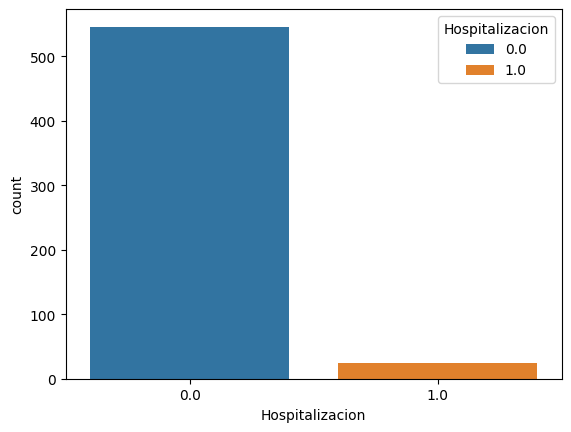

Hospitalizacion
0.0    546
1.0     24
Name: count, dtype: int64

In [77]:
sns.countplot(x="Hospitalizacion",data=df,hue="Hospitalizacion")
plt.show()
df["Hospitalizacion"].value_counts()

* Grafico de correlaciones

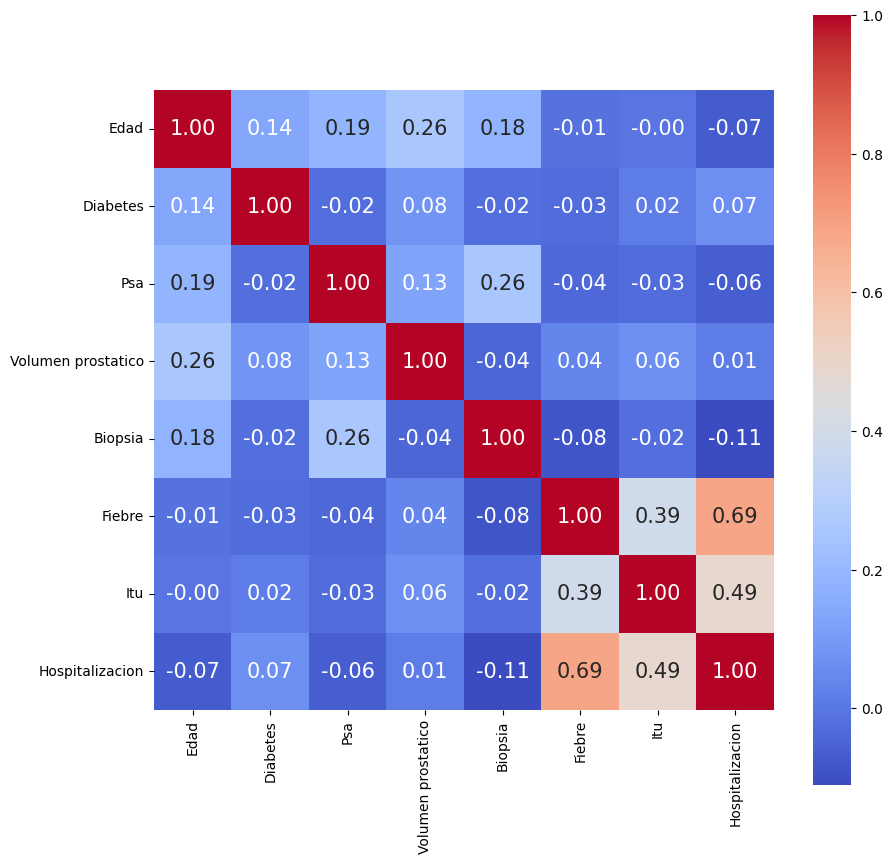

In [78]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, 
           yticklabels= df.columns,
           cmap= 'coolwarm')
plt.show()

* Cambio del tipo de dato

In [79]:
df.dropna(inplace=True)
df["Edad"]=df["Edad"].astype(int)
df["Biopsia"]=df["Biopsia"].astype(int)
df["Itu"]=df["Itu"].astype(int)
df["Psa"]=df["Itu"].astype(int)
# df = df.astype(int)

## Determinamos variables a utilizar 

In [80]:
X=df.drop(columns=["Hospitalizacion"])
y=df["Hospitalizacion"]
X.shape,y.shape

((567, 7), (567,))

## REALIZAMOS UN OVERSAMPLING

In [81]:
from imblearn.over_sampling import SMOTE
from collections import Counter 
#pip install imblearn

counter = Counter(y) # y es la variable objetivo (target) del dataset de entrenamiento
print('Antes',counter)
# oversampling el datased de entrenamiento usando SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X, y = smt.fit_resample(X, y)

counter = Counter(y)
print('Después',counter)

Antes Counter({0.0: 543, 1.0: 24})
Después Counter({1.0: 543, 0.0: 543})


## INSTANCIAMOS MODELO, ENTRENAMOS Y PREDECIMOS

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score,roc_auc_score

from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Instanciamos el modelo y lo entrenamos

clf = LogisticRegression()

# Lo entrenamos

clf.fit(X_train,y_train) 

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred = clf.predict(X)
print('Training:', roc_auc_score(y_train, y_pred_train))
print('Testing:', roc_auc_score(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
cr = classification_report(y_test, y_pred_test)

print("\n CONFUSSION MATRIX","\n",cm,end="\n")
print("CLASSIFICATION REPORT","\n",cr,end="\n")

Training: 0.9724712440460095
Testing: 0.9724621212121213

 CONFUSSION MATRIX 
 [[146   4]
 [  5 171]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       150
         1.0       0.98      0.97      0.97       176

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326



c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
